In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , recall_score , precision_score , f1_score, precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')
c=(0.48366628618847957, 0.1286467902201389, 0.31317188565991266)

In [2]:
df = pd.read_csv(r"C:\Users\akash\OneDrive\Documents\dataset\kaggle dataset\Rain_Austrailia.zip")

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
nans=df.isna().sum().sort_values(ascending=False)
pct=nans*100/df.shape[0]
uniques=df.nunique()
noted=pd.concat([nans,pct,uniques,df.dtypes],axis=1)
noted.columns=['Null count','Null percentage','n_unique values','data_type']
noted

,Null count,Null percentage,n_unique values,data_type
Sunshine,69835,48.009762,145,float64
Evaporation,62790,43.166506,358,float64
Cloud3pm,59358,40.807095,10,float64
Cloud9am,55888,38.421559,10,float64
Pressure9am,15065,10.356799,546,float64
Pressure3pm,15028,10.331363,549,float64
WindDir9am,10566,7.263853,16,object
WindGustDir,10326,7.098859,16,object
WindGustSpeed,10263,7.055548,67,float64
Humidity3pm,4507,3.098446,101,float64


In [6]:
print('number of rows in the dataset is ',df.shape[0],'.')
print('number of cols in the dataset is ',df.shape[1],'.')

number of rows in the dataset is  145460 .
number of cols in the dataset is  23 .


In [7]:
df.duplicated().sum()

0

### Handling missing values and out layers

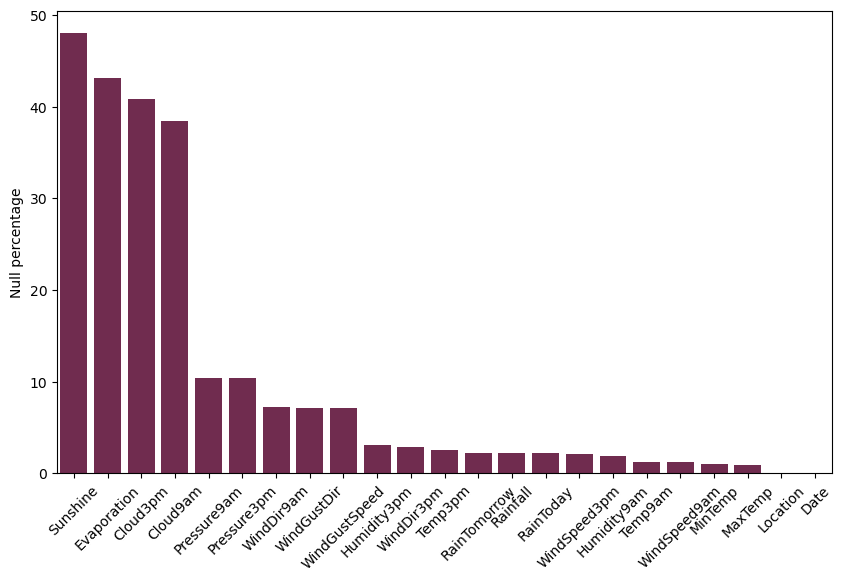

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=noted.index,y=noted['Null percentage'],color=c)
plt.xticks(rotation=45)
plt.show()

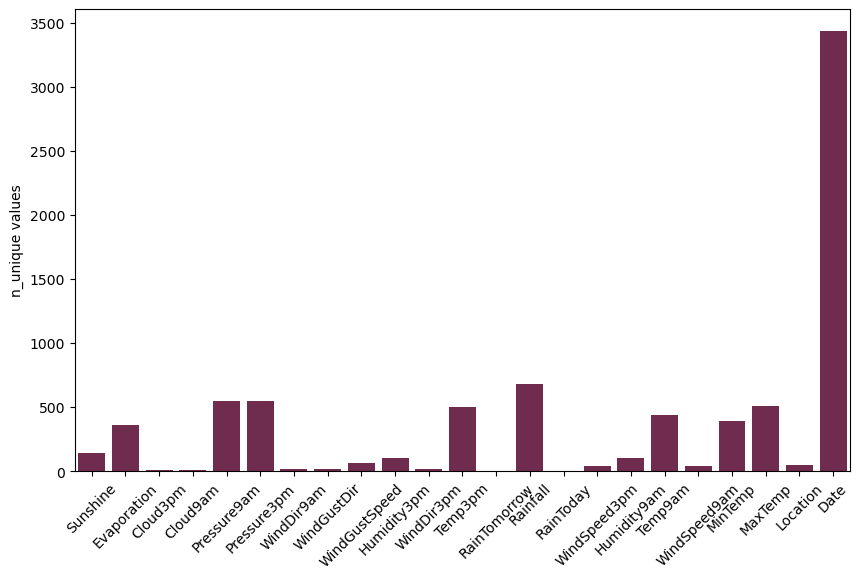

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=noted.index,y=noted['n_unique values'],color=c)
plt.xticks(rotation=45)
plt.show()

In [10]:
def impute_missing(df):
    loc_unique = df['Location'].unique()
    num_col = df.select_dtypes(exclude='object').columns
    cat_col = df.select_dtypes(include='object').columns

    for col in num_col:
        for loc in loc_unique:
            filt = df['Location'].isin([loc])
            med = df[filt][col].median()
            df.loc[filt, col] = df[filt][col].fillna(med)
    
    for col in cat_col:
        for loc in loc_unique:
            filt = df['Location'].isin([loc])
            if df[filt][col].empty:
                continue  # Skip to next location if empty
            mode = df[filt][col].mode()
            if not mode.empty:
                med = mode[0]
                df.loc[filt, col] = df[filt][col].fillna(med)
    return df

In [11]:
df=impute_missing(df)

In [12]:
remaining_nulls=df.isnull().sum().sort_values(ascending=False)

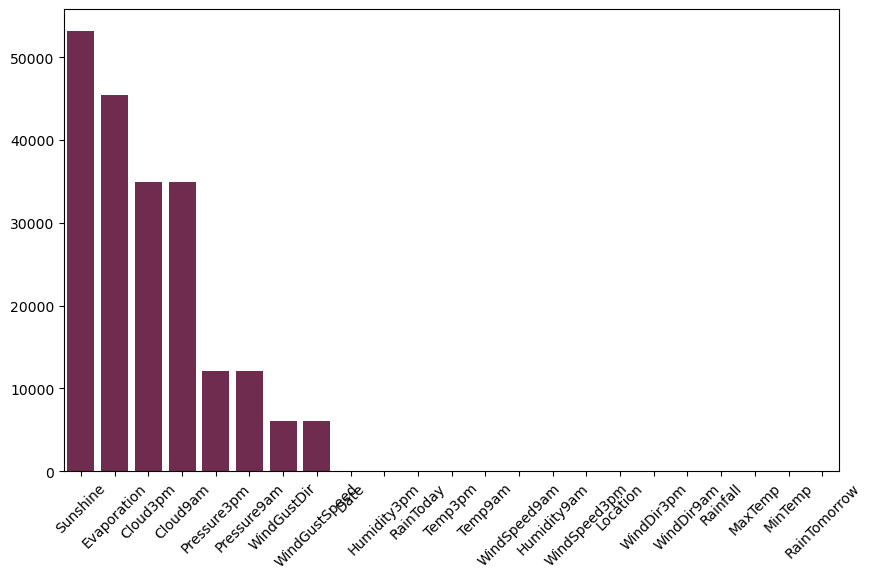

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=remaining_nulls.index,y=remaining_nulls.values,color=c)
plt.xticks(rotation=45)
plt.show()

In [14]:
df.dropna(subset=['WindGustDir' , 'WindGustSpeed' , 'WindDir9am', 'WindDir3pm' , 'Pressure9am' , 'Pressure3pm' , 'RainToday' ,  'RainTomorrow',
                  'Evaporation','Sunshine', 'Cloud9am' , 'Cloud3pm']
                    , inplace=True  , axis= 0)

In [15]:
df['Date'] = pd.to_datetime(df['Date'] )

In [16]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [17]:
df.drop('Date',axis=1,inplace=True)

In [18]:
num_col = df.select_dtypes(exclude='object').columns
cat_col = df.select_dtypes(include='object').columns

In [19]:
len(num_col)

19

[]

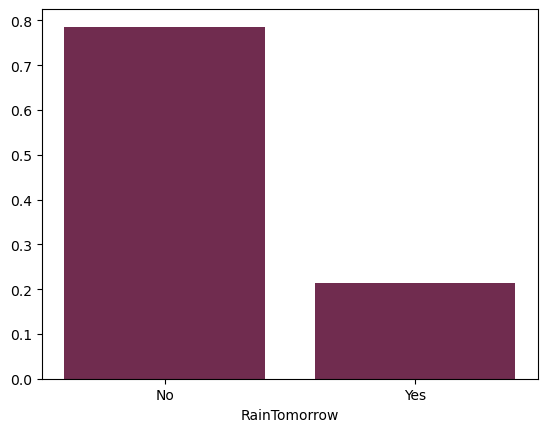

In [20]:
co=df['RainTomorrow'].value_counts()/df['RainTomorrow'].count()
sns.barplot(x=co.index,y=co.values,color=c)
plt.plot()

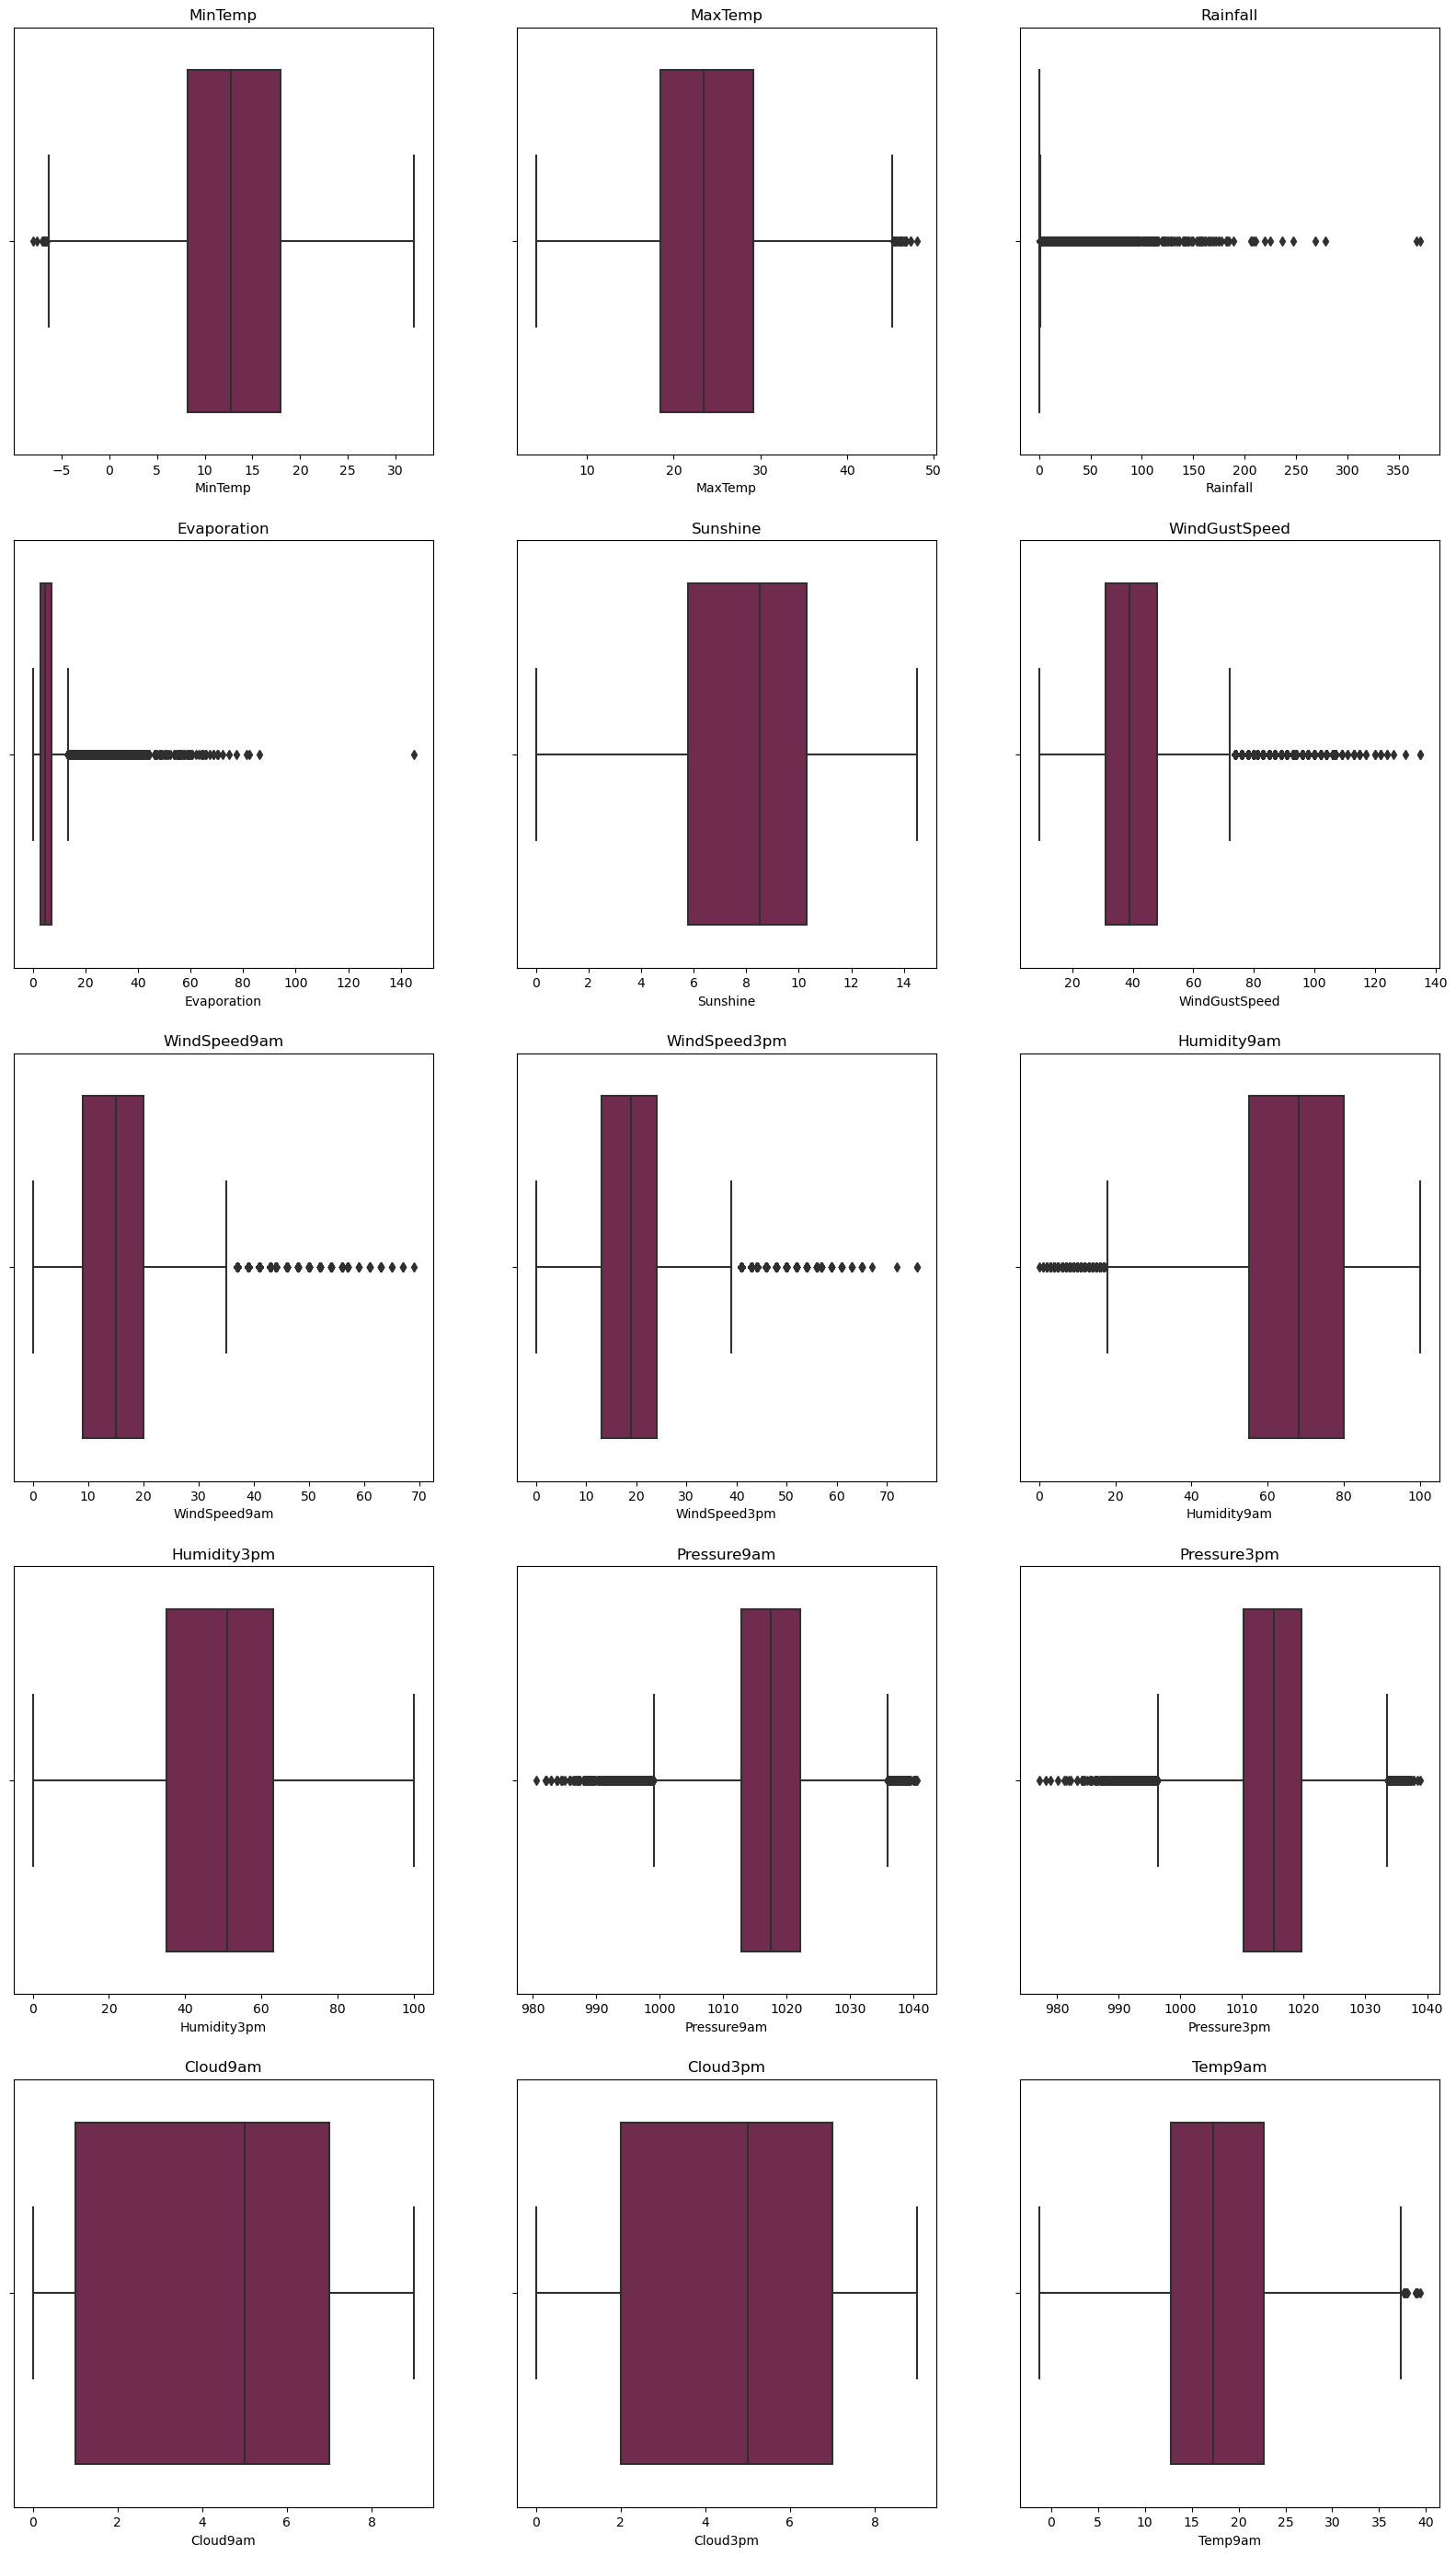

In [21]:
fig,ax=plt.subplots(5,3,figsize=(20,35))
idx=0
for i in range(5):
    for j in range(3):
        sns.boxplot(ax=ax[i, j], x=df[num_col[idx]],color=c)
        ax[i, j].set_title(num_col[idx])
        idx=idx+1

In [22]:
from scipy import stats
import numpy as np

def handle_outliers(df,impute_strategy='median'):
    num_col = df.select_dtypes(exclude='object').columns
    for col in num_col:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers = np.where(z_scores > 2)[0]  

        if len(outliers) == 0:
            continue 
            
        if impute_strategy == 'median':
            imputed_value = df[col].median()
        elif impute_strategy == 'mean':
            imputed_value = df[col].mean()
            
        df.loc[outliers, col] = imputed_value

    return df

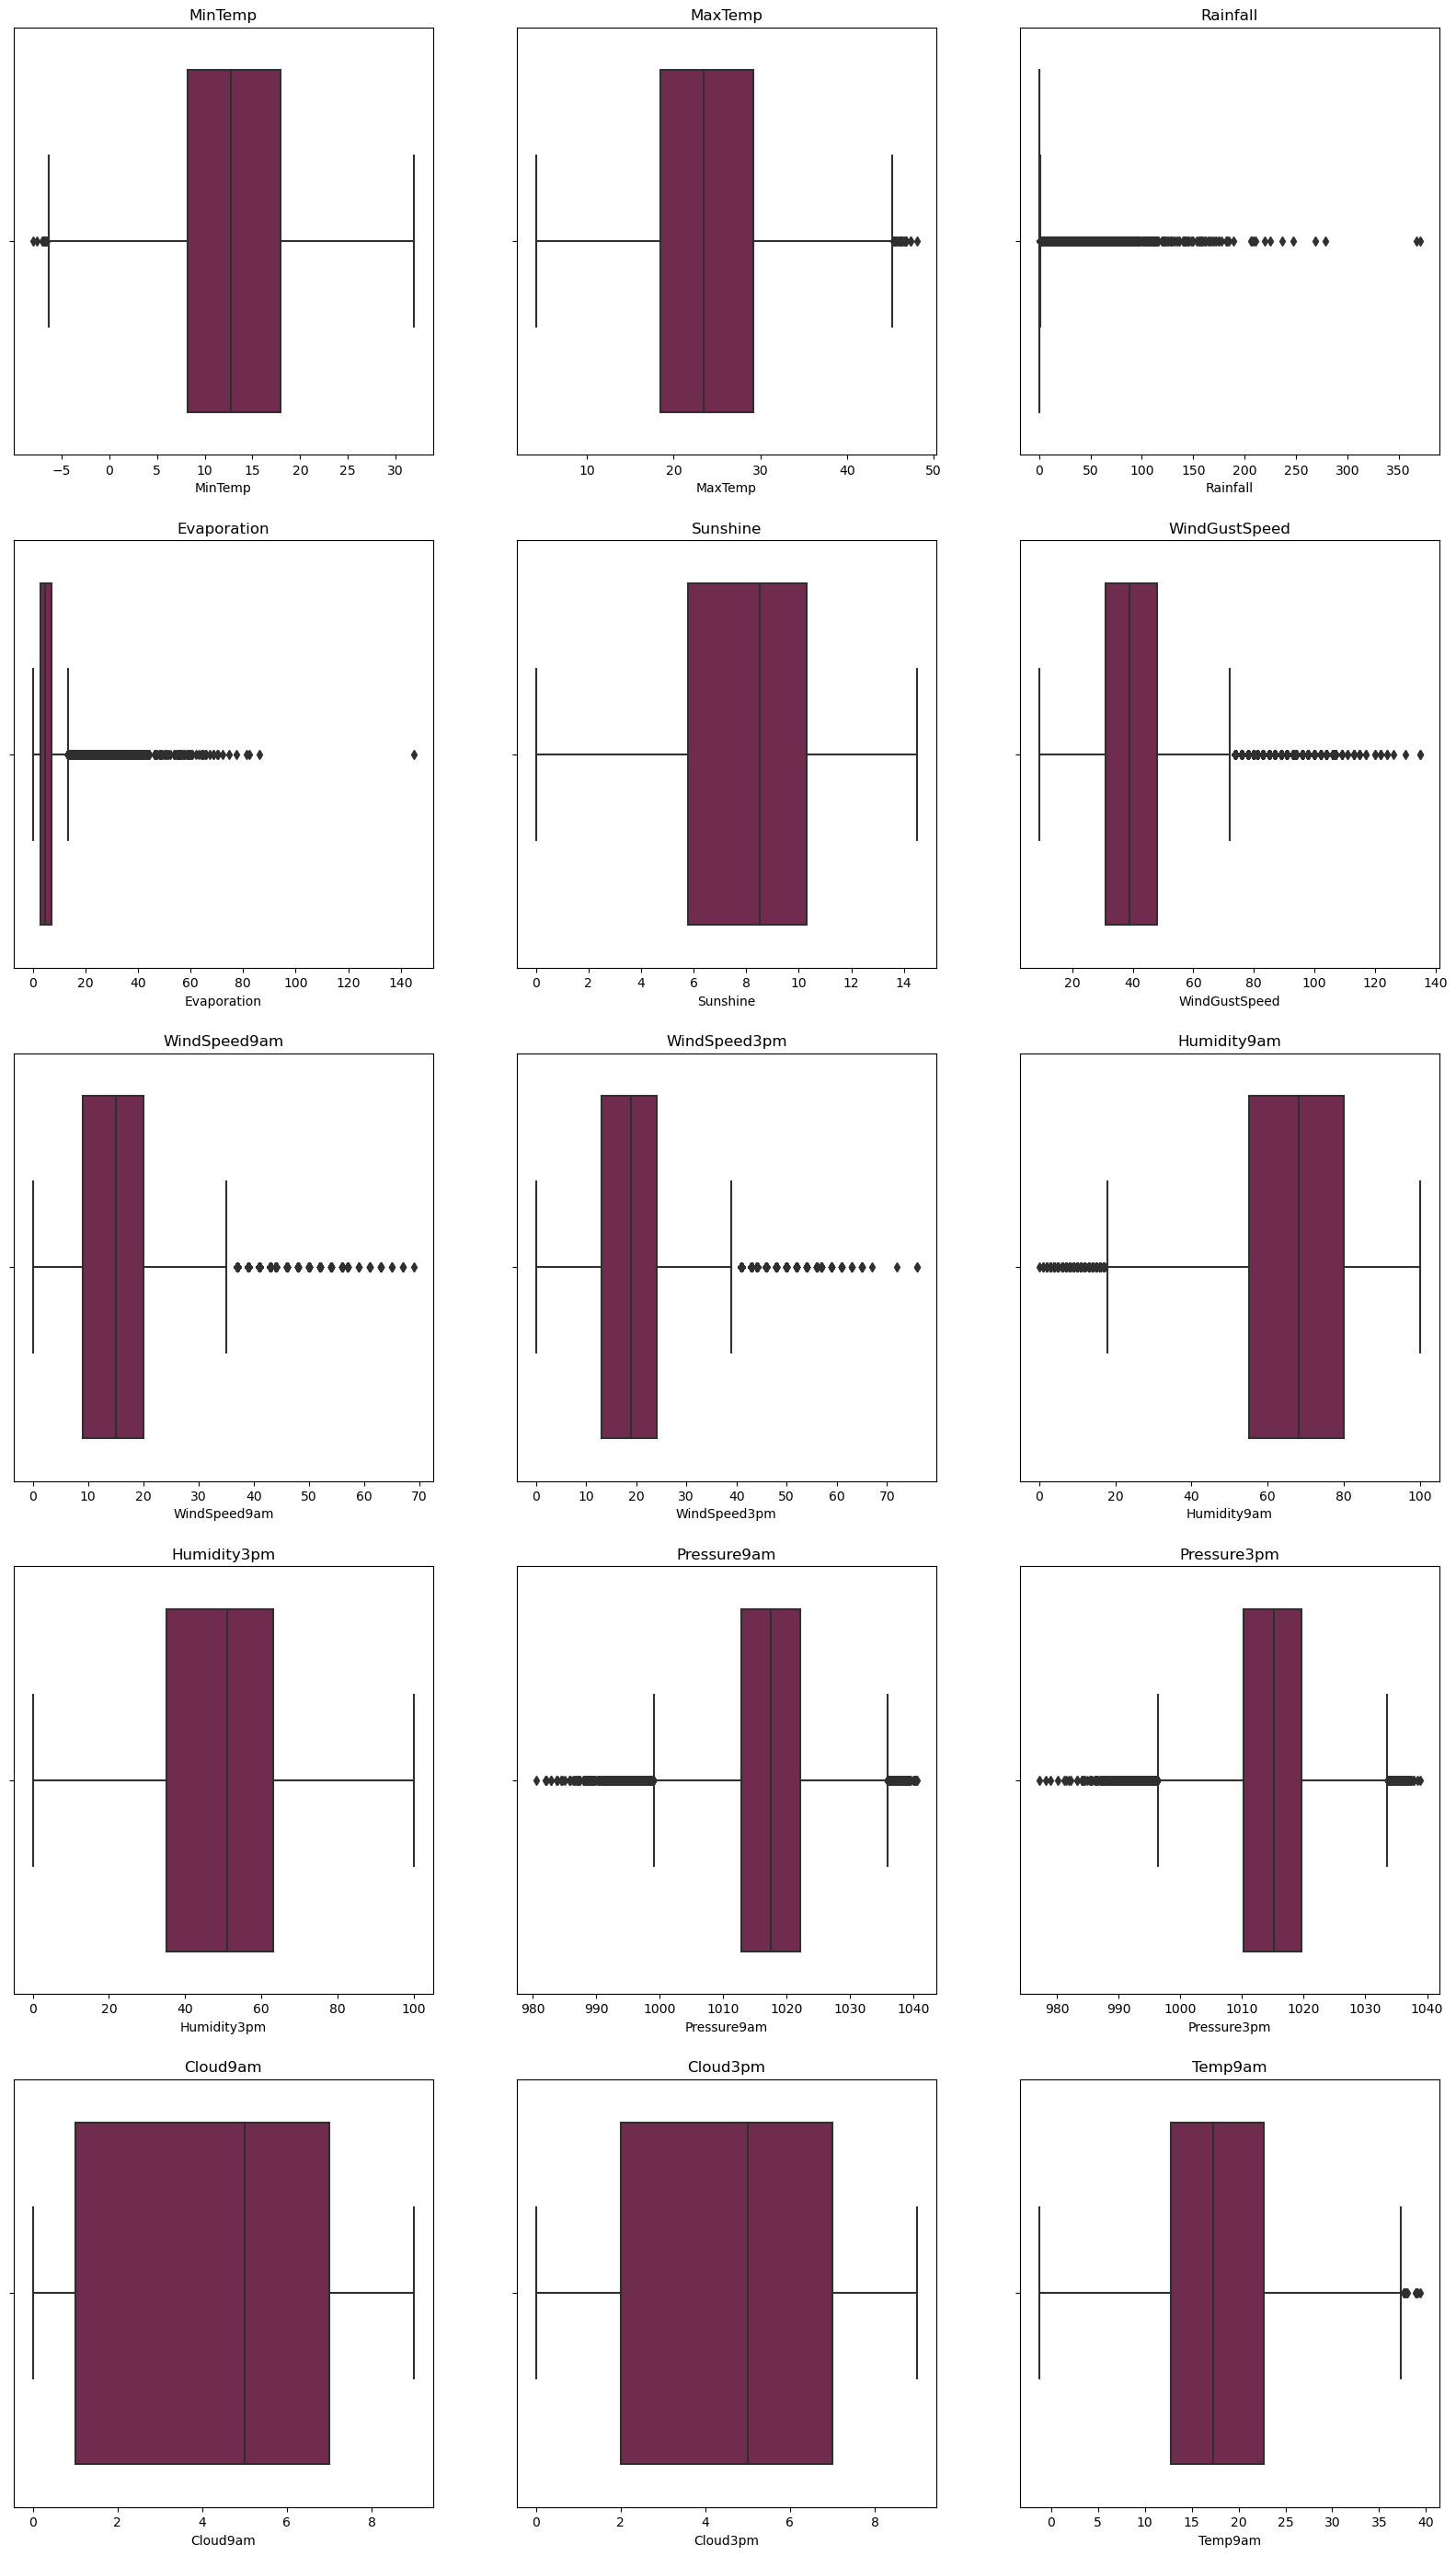

In [23]:
fig,ax=plt.subplots(5,3,figsize=(20,35))
idx=0
for i in range(5):
    for j in range(3):
        sns.boxplot(ax=ax[i, j], x=df[num_col[idx]],color=c)
        ax[i, j].set_title(num_col[idx])
        idx=idx+1

In [24]:
def handle_outlires_IQR(df):
    num_col = df.select_dtypes(exclude='object').columns
    for col in num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        TQR=1.5*IQR
        outliers = df[ ( df[col] < (Q1 -IQR)) | (df[col] > (Q3 +IQR) ) ][col]
        med_value=df[col].median()
        df[df[col].isin([outliers])][col]=med_value
    return df

In [25]:
df=handle_outlires_IQR(df)

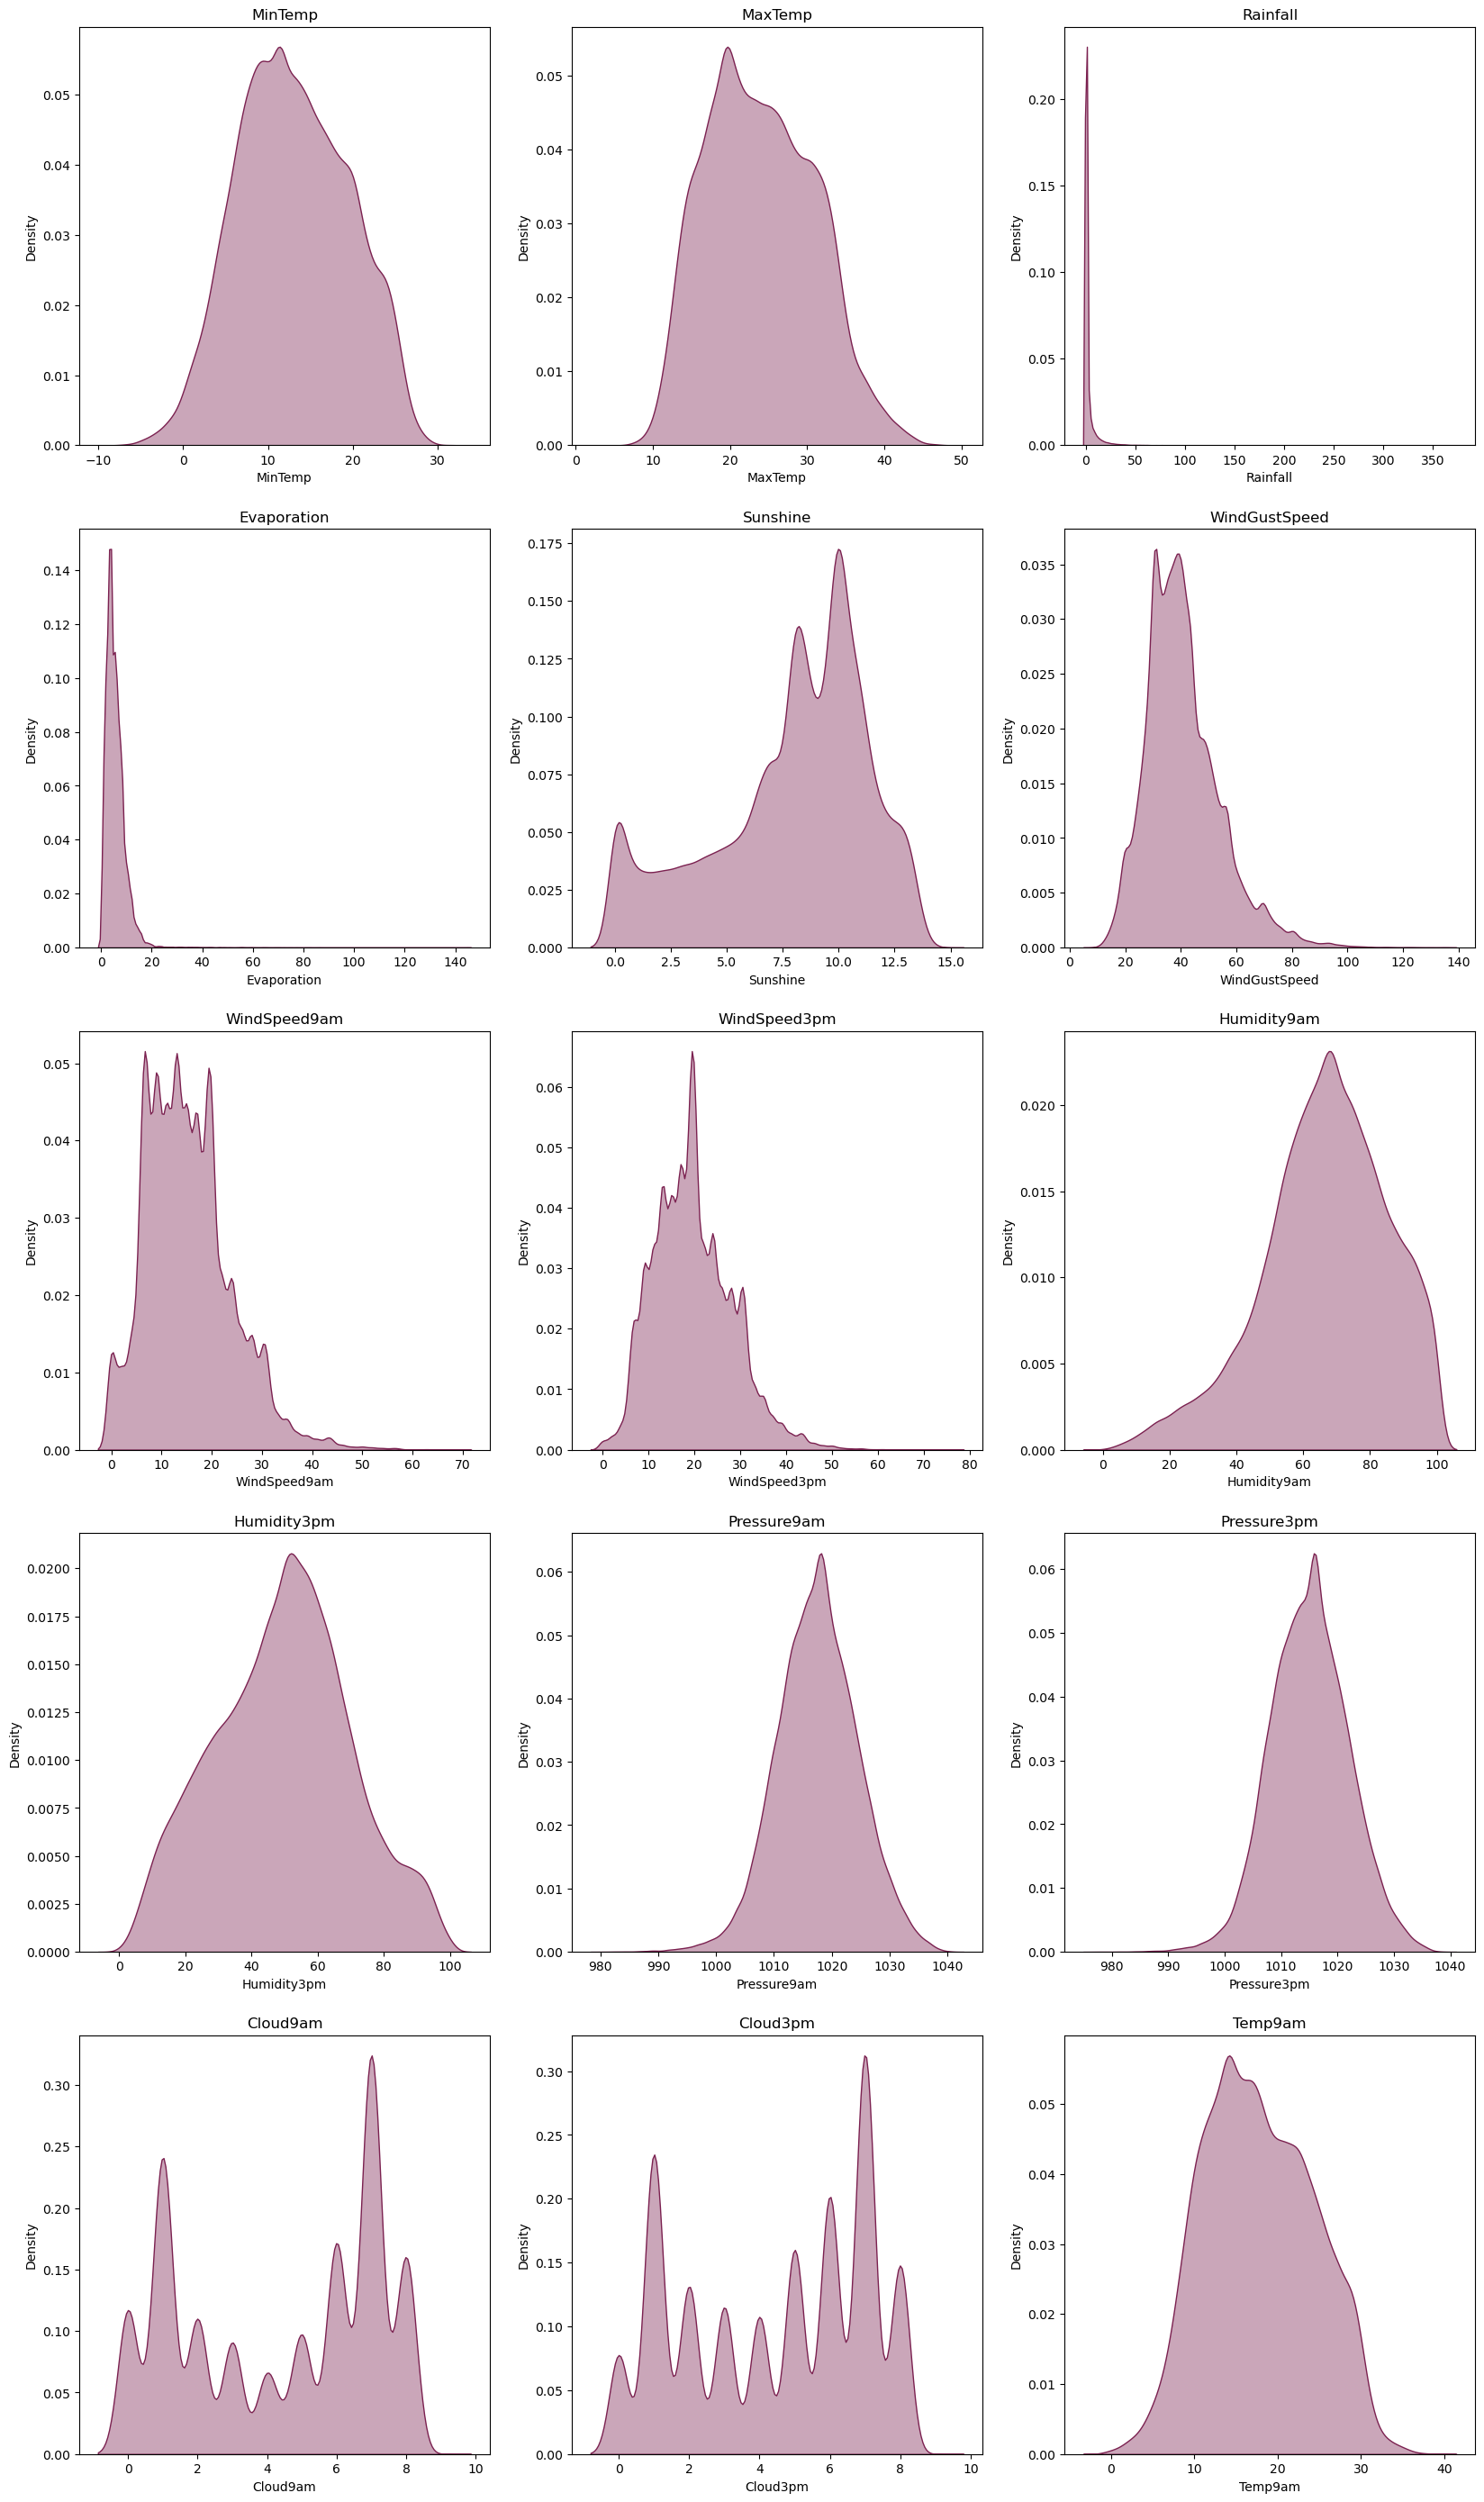

In [26]:
fig,ax=plt.subplots(5,3,figsize=(20,35))
idx=0
for i in range(5):
    for j in range(3):
        sns.kdeplot(ax=ax[i, j], x=df[num_col[idx]],color=c,alpha=0.4,fill=True)
        ax[i, j].set_title(num_col[idx])
        idx=idx+1

In [27]:
num_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
]
        
)
num_pipeline

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [28]:
cat_pipeline=Pipeline( steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])
cat_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder())])

In [29]:
features=df.drop('RainTomorrow',axis=1)
labels=df['RainTomorrow']

In [30]:
num_col = features.select_dtypes(exclude='object').columns
cat_col = features.select_dtypes(include='object').columns

In [31]:
x_train,x_test,y_train,y_test =train_test_split(features,labels,test_size=0.30,random_state=42)

In [32]:
col_transformer=ColumnTransformer(
    transformers=[('num_pipeline',num_pipeline,num_col)
                ,('cat_pipeline',cat_pipeline,cat_col)
                ]
    , remainder='passthrough',n_jobs=-1

)
col_transformer

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])

In [34]:
rf = DecisionTreeClassifier(random_state=42)

In [45]:
log = LogisticRegression(random_state=42)

In [54]:
svc = SVC(random_state=42)

In [47]:
pipe=make_pipeline(col_transformer,log)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [36]:
pipefinal=make_pipeline(col_transformer,rf)
pipefinal

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressur...ud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [55]:
pipe_linefinal=make_pipeline(col_transformer,svc)
pipe_linefinal

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('svc', SVC(random_state=42))])

### Modeling and Evaluating

In [48]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [50]:
prd=pipe.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test, prd) , '\n')

print('Classification Report :', '\n',classification_report(y_test, prd))

Accuracy Score : 0.8536565050807929 

Classification Report : 
               precision    recall  f1-score   support

          No       0.88      0.95      0.91     18909
         Yes       0.72      0.51      0.60      5103

    accuracy                           0.85     24012
   macro avg       0.80      0.73      0.75     24012
weighted avg       0.84      0.85      0.84     24012



In [37]:
pipefinal.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressur...ud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [62]:
pred=pipefinal.predict(x_test)

In [52]:
print('Accuracy Score :', round(accuracy_score(y_test, pred)*100,2),"%" , '\n')

print('Classification Report :', '\n',classification_report(y_test, pred))

Accuracy Score : 79.49 % 

Classification Report : 
               precision    recall  f1-score   support

          No       0.87      0.86      0.87     18909
         Yes       0.52      0.54      0.53      5103

    accuracy                           0.79     24012
   macro avg       0.70      0.70      0.70     24012
weighted avg       0.80      0.79      0.80     24012



In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred=cross_val_predict(pipefinal,x_train,y_train,cv=3)
cm=confusion_matrix(y_train,y_pred)
cm

array([[37887,  6119],
       [ 5606,  6416]], dtype=int64)

In [59]:
pipe_linefinal.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'year'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))])),
                ('svc', SVC(random_state=42))])

In [63]:
prediction=pipe_linefinal.predict(x_test)

In [64]:
print('Accuracy Score :', round(accuracy_score(y_test, prediction)*100,2),"%" , '\n')

print('Classification Report :', '\n',classification_report(y_test, prediction))

Accuracy Score : 85.53 % 

Classification Report : 
               precision    recall  f1-score   support

          No       0.87      0.96      0.91     18909
         Yes       0.76      0.47      0.58      5103

    accuracy                           0.86     24012
   macro avg       0.81      0.71      0.75     24012
weighted avg       0.85      0.86      0.84     24012



*Accuracy of Suport vector classifier algorithm is 85.53 %* 